In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

def load_and_plot_results(results_dir):
    # Load the results and hyperparameters
    results = np.load(os.path.join(results_dir, 'training_results.npy'))
    with open(os.path.join(results_dir, 'hyperparameters.json'), 'r') as f:
        hyperparams = json.load(f)
    
    train_sizes = hyperparams['train_sizes']
    
    # Extract initial and best test errors
    initial_test_errors = results[1, :]
    best_test_errors = results[3, :]
    
    # Create the plot
    plt.figure(figsize=(5, 3))
    
    # Plot both initial and best test errors
    plt.plot(train_sizes, initial_test_errors, 'o-', color='#FF89E7', 
             linewidth=3, markersize=2, label='Initial Test Error')
    plt.plot(train_sizes, best_test_errors, 'o-', color='#7400FF', 
             linewidth=3, markersize=2, label='Best Test Error')
    
    # Set both scales to log
    plt.xscale('log')
    plt.yscale('log')
    
    # Labels
    plt.xlabel('Training Set Size')
    plt.ylabel('Test Error')
    
    # Customize tick parameters
    plt.tick_params(axis='both', labelcolor='grey', size=0)
    
    # Add legend and title
    plt.legend()
    plt.title("Test Error vs Training Set Size")
    
    # Remove grid
    plt.grid(False)
    
    # Show plot
    plt.tight_layout()
    
    # Save the plot
    plot_path = os.path.join(results_dir, 'test_error_plot.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Plot saved to: {plot_path}")
    
    # Print the numerical results
    print("\nNumerical Results:")
    print("Train Size | Initial Test Error | Best Test Error")
    print("-" * 50)
    for size, init_err, best_err in zip(train_sizes, initial_test_errors, best_test_errors):
        print(f"{size:9d} | {init_err:16.6f} | {best_err:13.6f}")

if __name__ == "__main__":
    # Replace this with your results directory path
    results_dir = "/mnt/users/goringn/NNs_vs_Kernels/results/training_run_sgd_20241128_170704"
    load_and_plot_results(results_dir)

Plot saved to: /mnt/users/goringn/NNs_vs_Kernels/results/training_run_sgd_20241128_170704/test_error_plot.png

Numerical Results:
Train Size | Initial Test Error | Best Test Error
--------------------------------------------------
       10 |         1.019011 |      0.961526
      500 |         1.037569 |      0.818741
     1000 |         0.963651 |      0.545635
     5000 |         1.069458 |      0.173178
    10000 |         1.109804 |      0.127312
    20000 |         0.888108 |      0.023876
    50000 |         1.042379 |      0.024611
   100000 |         1.270552 |      1.270371


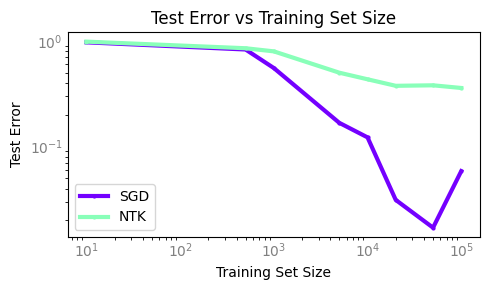


Numerical Results:
Train Size | SGD Test Error | NTK Test Error
------------------------------------------------------------
       10 |      0.966488 |      0.981279
      500 |      0.826821 |      0.849757
     1000 |      0.552256 |      0.793953
     5000 |      0.167327 |      0.498822
    10000 |      0.121965 |      0.432134
    20000 |      0.031229 |      0.374914
    50000 |      0.017061 |      0.379048
   100000 |      0.058494 |      0.357587


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
%matplotlib inline

def plot_learning_curves(sgd_dir, kernel_dir, kernel_type='nngp', save_plot=False, save_path=None):
    """
    Plot learning curves comparing SGD and kernel (NNGP/NTK) results
    
    Args:
        sgd_dir: Directory containing SGD results
        kernel_dir: Directory containing kernel results
        kernel_type: Either 'nngp' or 'ntk'
        save_plot: Whether to save the plot
        save_path: Path to save the plot (if save_plot is True)
    """
    # Load SGD results
    sgd_results = np.load(os.path.join(sgd_dir, 'training_results.npy'))
    with open(os.path.join(sgd_dir, 'hyperparameters.json'), 'r') as f:
        sgd_hyperparams = json.load(f)
    
    # Load kernel results
    kernel_train_sizes = np.load(os.path.join(kernel_dir, 'train_sizes.npy'))
    kernel_test_errors = np.load(os.path.join(kernel_dir, 'test_errors.npy'))
    
    train_sizes = sgd_hyperparams['train_sizes']
    best_test_errors = sgd_results[3, :]  # Index 3 contains best test errors
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 3))
    
    # Plot SGD and kernel results
    ax.plot(train_sizes, best_test_errors, 'o-', color='#7400FF', 
            linewidth=3, markersize=2, label='SGD')
    ax.plot(kernel_train_sizes, kernel_test_errors, 'o-', color='#89FFB9', 
            linewidth=3, markersize=2, label=kernel_type.upper())
    
    # Set both scales to log
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Labels
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Test Error')
    
    # Customize tick parameters
    ax.tick_params(axis='both', labelcolor='grey', size=0)
    
    # Add legend and title
    ax.legend()
    ax.set_title("Test Error vs Training Set Size")
    
    # Remove grid
    ax.grid(False)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if requested
    if save_plot and save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")
    
    # Display plot
    plt.show()
    
    # Print the numerical results
    print("\nNumerical Results:")
    print(f"Train Size | SGD Test Error | {kernel_type.upper()} Test Error")
    print("-" * 60)
    for size, sgd_err, kernel_err in zip(train_sizes, best_test_errors, kernel_test_errors):
        print(f"{size:9d} | {sgd_err:13.6f} | {kernel_err:13.6f}")

# Example usage:
sgd_dir = "/mnt/users/goringn/NNs_vs_Kernels/results/training_run_20241128_161223"
kernel_dir = "/mnt/users/goringn/NNs_vs_Kernels/results/experiment_20241201_200531"
plot_learning_curves(sgd_dir, kernel_dir, kernel_type='ntk')

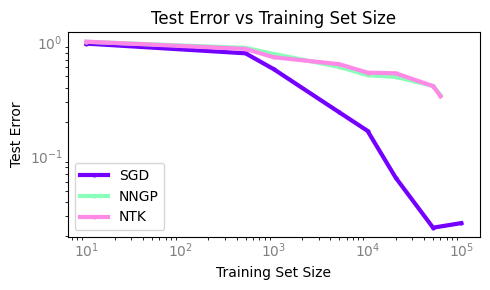


Numerical Results:
Train Size | SGD Test Error | NNGP Test Error | NTK Test Error
------------------------------------------------------------


/tmp/ipykernel_4092457/2372250116.py:50: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  nngp_idx = np.where(nngp_results['train_sizes'] == size)[0][0]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
%matplotlib inline

# Load SGD results
sgd_dir = "/mnt/users/goringn/NNs_vs_Kernels/results/training_run_sgd_20241203_022356"  # Please provide your SGD directory
sgd_results = np.load(os.path.join(sgd_dir, 'training_results.npy'))
with open(os.path.join(sgd_dir, 'hyperparameters.json'), 'r') as f:
    sgd_hyperparams = json.load(f)
train_sizes = sgd_hyperparams['train_sizes']
best_test_errors = sgd_results[3, :]  # Index 3 contains best test errors

# Load kernel results
nngp_dir = "/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/nngp_400_20241205_032426"  # Please provide your NNGP directory
ntk_dir = "/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/ntk_400_20241205_032855"    # Please provide your NTK directory
nngp_results = np.load(os.path.join(nngp_dir, 'prediction_results.npy'), allow_pickle=True).item()
ntk_results = np.load(os.path.join(ntk_dir, 'prediction_results.npy'), allow_pickle=True).item()

# Create plot
fig, ax = plt.subplots(figsize=(5, 3))

# Plot all curves with specified colors
ax.plot(train_sizes, best_test_errors, 'o-', color='#7400FF', 
        linewidth=3, markersize=2, label='SGD')
ax.plot(nngp_results['train_sizes'], nngp_results['results_array'][0], 'o-', 
        color='#89FFB9', linewidth=3, markersize=2, label='NNGP')
ax.plot(ntk_results['train_sizes'], ntk_results['results_array'][0], 'o-', 
        color='#FF89E7', linewidth=3, markersize=2, label='NTK')

# Set scales and labels
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('Test Error')
ax.tick_params(axis='both', labelcolor='grey', size=0)
ax.legend()
ax.set_title("Test Error vs Training Set Size")
ax.grid(False)

plt.tight_layout()
plt.show()

# Print numerical results
print("\nNumerical Results:")
print("Train Size | SGD Test Error | NNGP Test Error | NTK Test Error")
print("-" * 60)
for i, size in enumerate(train_sizes):
    nngp_idx = np.where(nngp_results['train_sizes'] == size)[0][0]
    ntk_idx = np.where(ntk_results['train_sizes'] == size)[0][0]
    print(f"{size:9d} | {best_test_errors[i]:13.6f} | "
          f"{nngp_results['results_array'][0][nngp_idx]:13.6f} | "
          f"{ntk_results['results_array'][0][ntk_idx]:13.6f}")

In [ ]:
#### test

Loaded 88 total results from 38 files

Available widths: [20, 40, 75, 85, 120, 200, 400, 600, 1000, 1500, 2000, 3000, 4000, 5000, 8000]


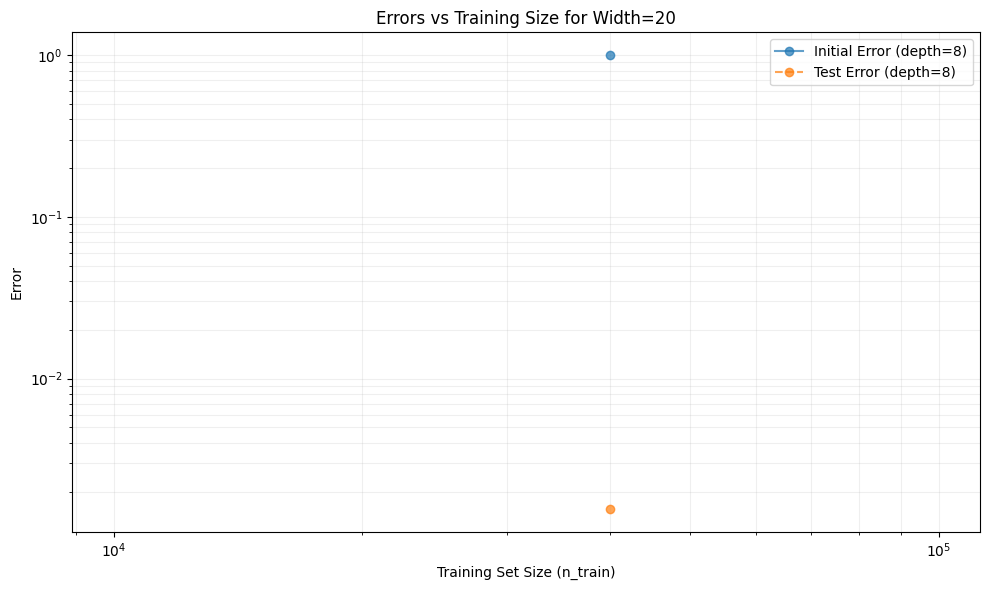


Values for width=20:

Depth=8:
n_train | initial_error | test_error
---------------------------------------------
  40000 | 0.998284 | 0.001559


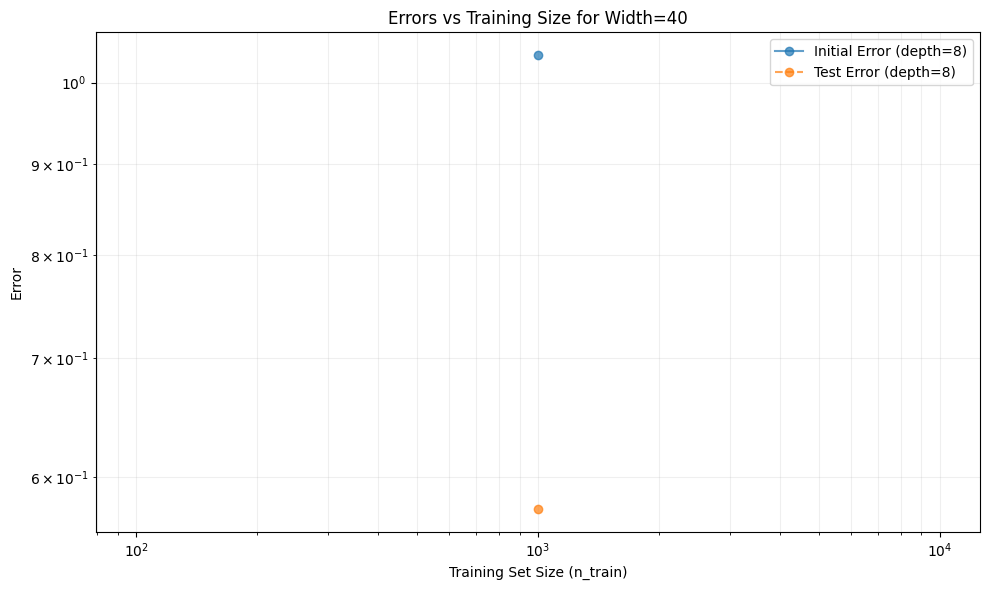


Values for width=40:

Depth=8:
n_train | initial_error | test_error
---------------------------------------------
   1000 | 1.036307 | 0.575220


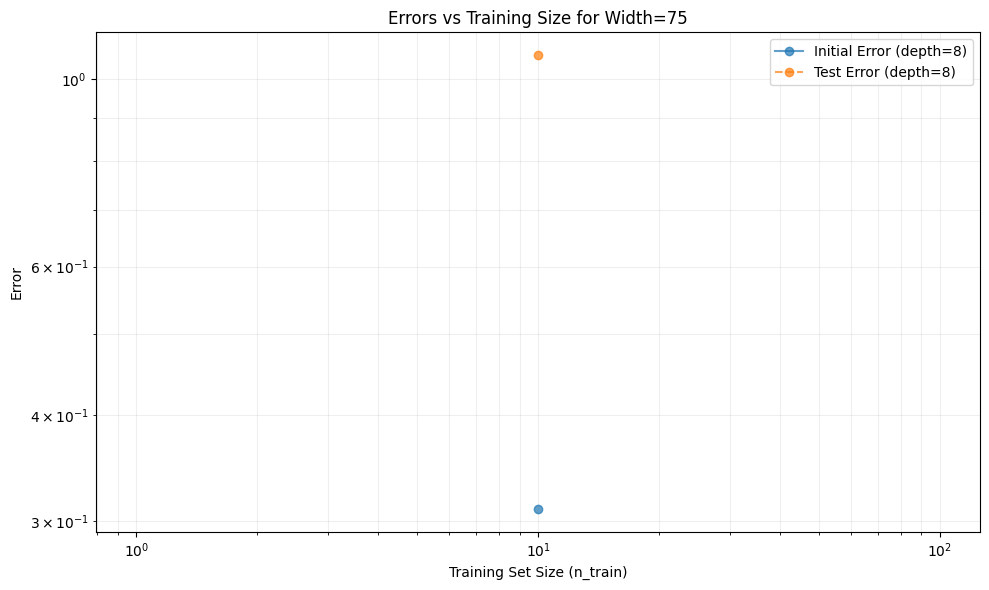


Values for width=75:

Depth=8:
n_train | initial_error | test_error
---------------------------------------------
     10 | 0.309802 | 1.067542


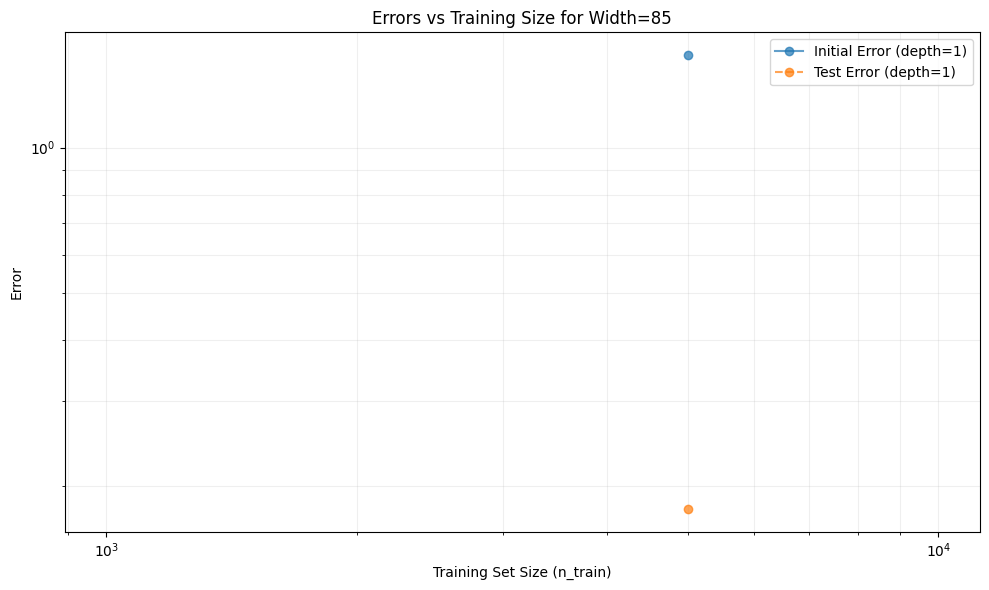


Values for width=85:

Depth=1:
n_train | initial_error | test_error
---------------------------------------------
   5000 | 1.552107 | 0.179279


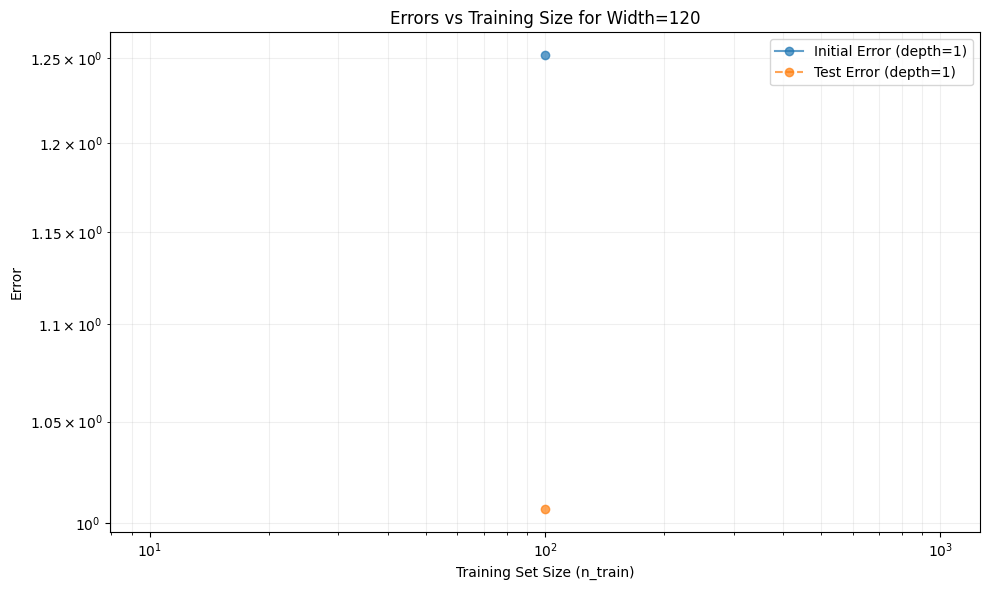


Values for width=120:

Depth=1:
n_train | initial_error | test_error
---------------------------------------------
    100 | 1.251649 | 1.006745


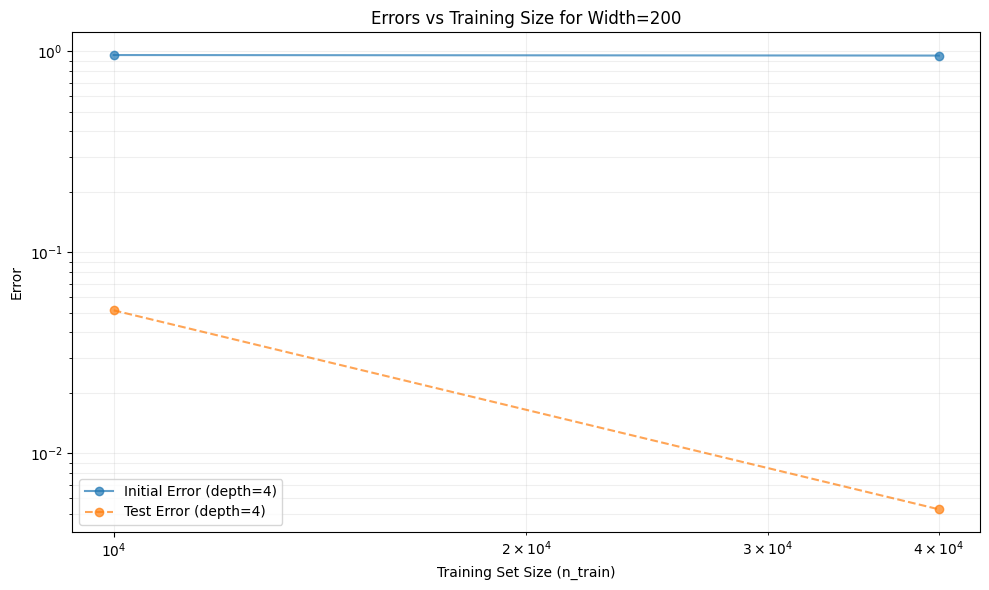


Values for width=200:

Depth=4:
n_train | initial_error | test_error
---------------------------------------------
  10000 | 0.959926 | 0.051543
  40000 | 0.954130 | 0.005278


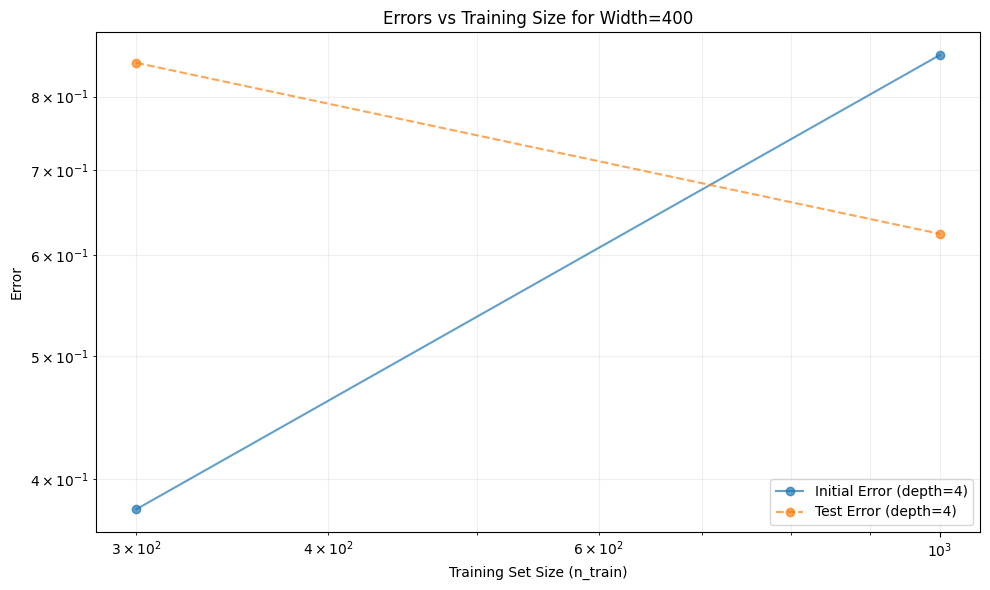


Values for width=400:

Depth=4:
n_train | initial_error | test_error
---------------------------------------------
    300 | 0.378907 | 0.850505
   1000 | 0.862561 | 0.623969


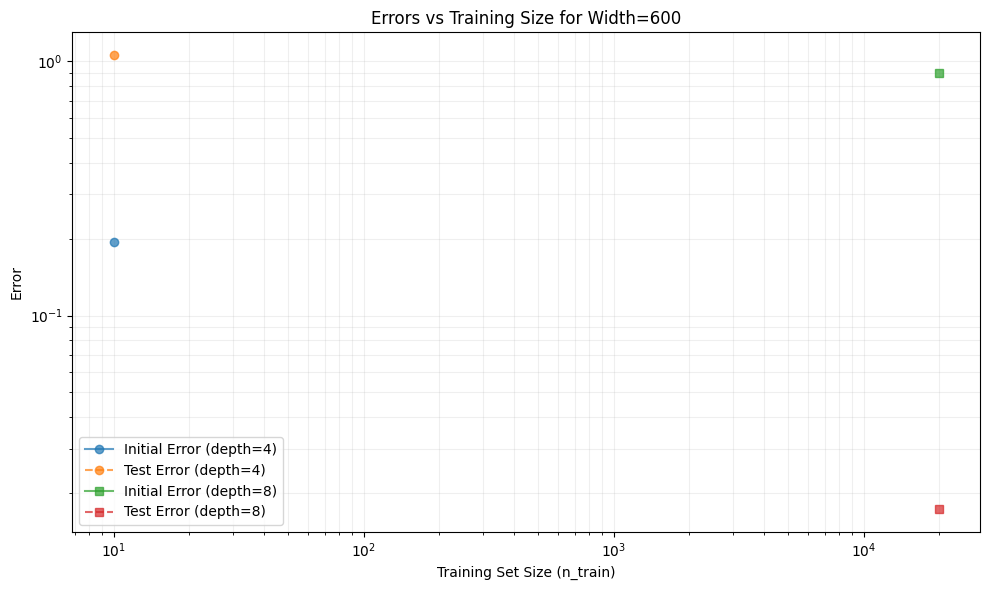


Values for width=600:

Depth=4:
n_train | initial_error | test_error
---------------------------------------------
     10 | 0.195450 | 1.059834

Depth=8:
n_train | initial_error | test_error
---------------------------------------------
  20000 | 0.900002 | 0.017307


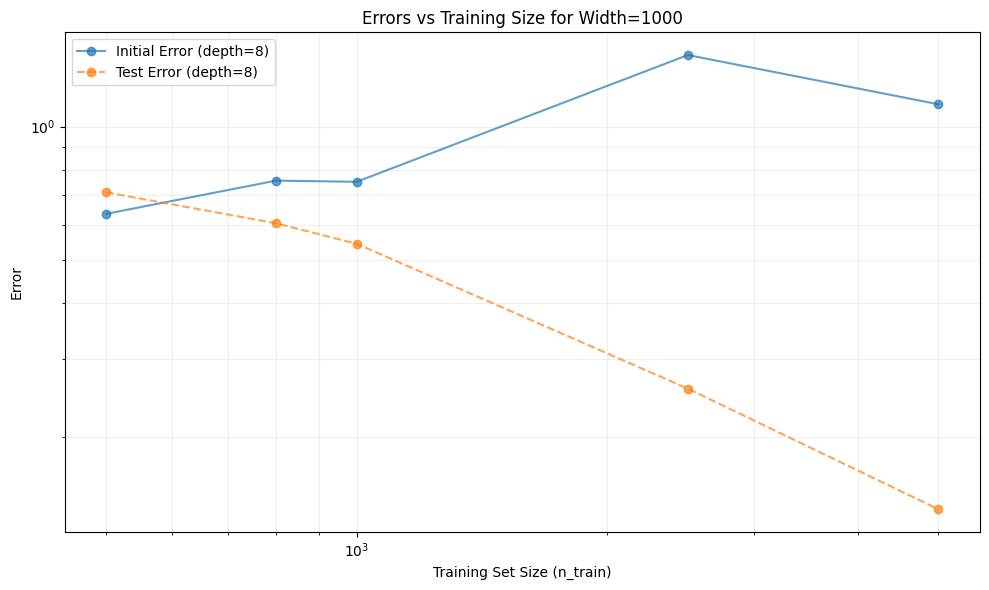


Values for width=1000:

Depth=8:
n_train | initial_error | test_error
---------------------------------------------
    500 | 0.635988 | 0.711013
    800 | 0.755554 | 0.605578
   1000 | 0.751053 | 0.544417
   2500 | 1.449914 | 0.256738
   5000 | 1.123067 | 0.137272


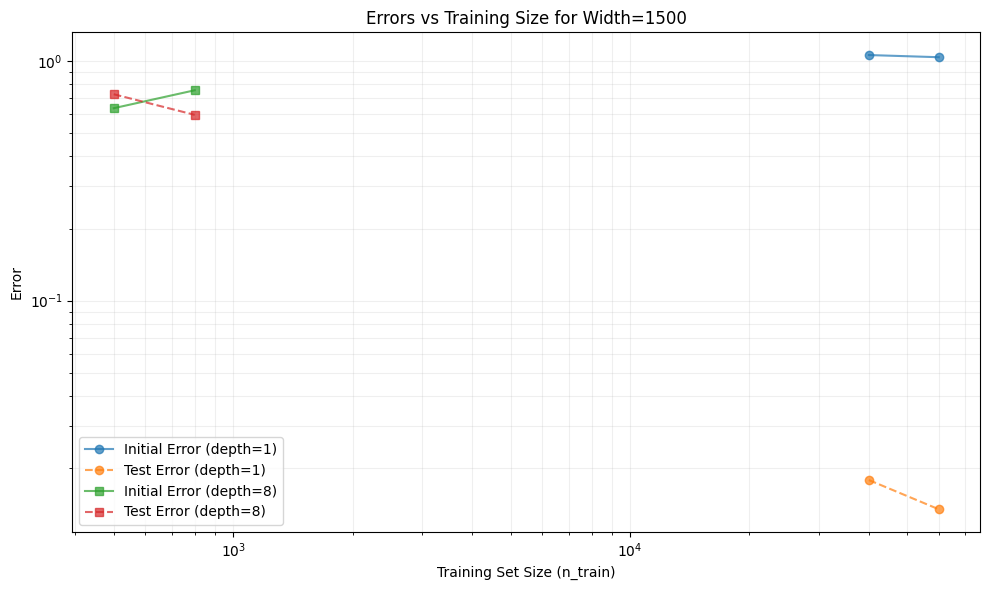


Values for width=1500:

Depth=1:
n_train | initial_error | test_error
---------------------------------------------
  40000 | 1.058340 | 0.017856
  60000 | 1.036483 | 0.013488

Depth=8:
n_train | initial_error | test_error
---------------------------------------------
    500 | 0.635159 | 0.726350
    800 | 0.754532 | 0.595903


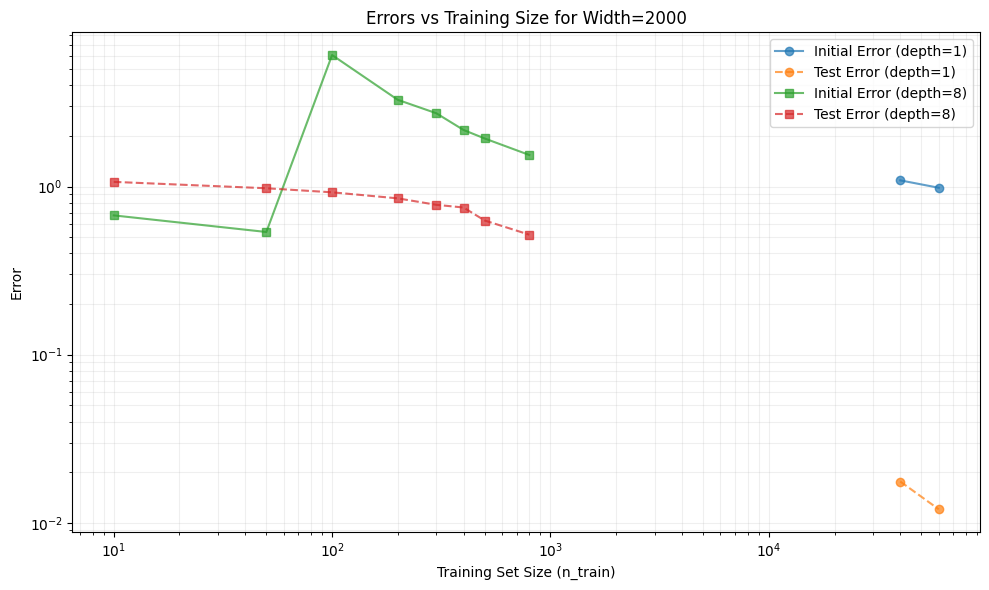


Values for width=2000:

Depth=1:
n_train | initial_error | test_error
---------------------------------------------
  40000 | 1.089059 | 0.017575
  60000 | 0.984077 | 0.012021

Depth=8:
n_train | initial_error | test_error
---------------------------------------------
     10 | 0.673970 | 1.066829
     50 | 0.536802 | 0.977404
    100 | 6.063480 | 0.924550
    200 | 3.282249 | 0.851109
    300 | 2.732127 | 0.779098
    400 | 2.171934 | 0.750688
    500 | 1.932743 | 0.628278
    800 | 1.542151 | 0.517466


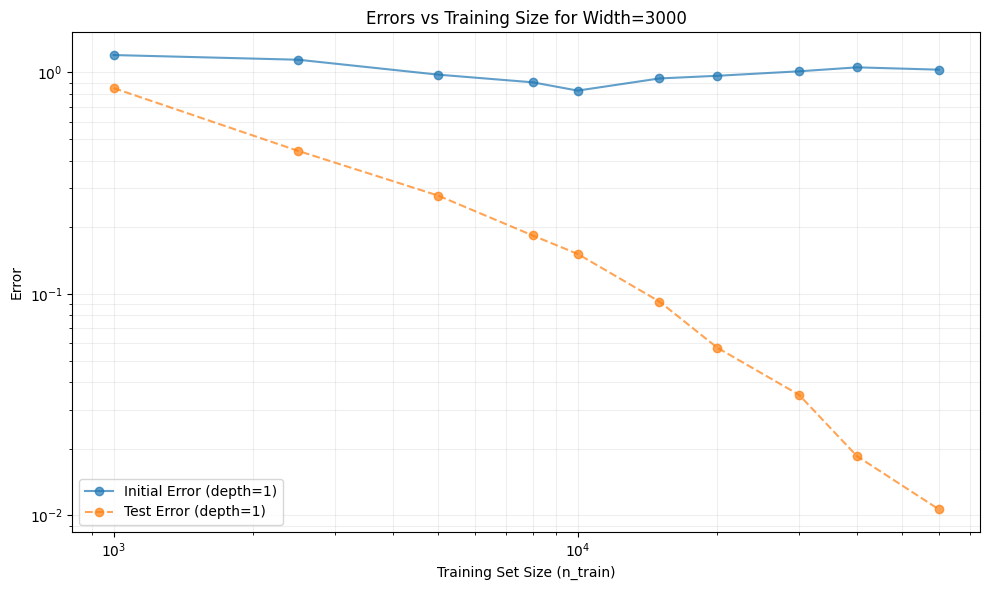


Values for width=3000:

Depth=1:
n_train | initial_error | test_error
---------------------------------------------
   1000 | 1.197729 | 0.849070
   2500 | 1.140675 | 0.441941
   5000 | 0.976999 | 0.277946
   8000 | 0.902004 | 0.183530
  10000 | 0.827590 | 0.151488
  15000 | 0.939087 | 0.092360
  20000 | 0.965394 | 0.057112
  30000 | 1.011417 | 0.035008
  40000 | 1.053987 | 0.018499
  60000 | 1.028824 | 0.010654


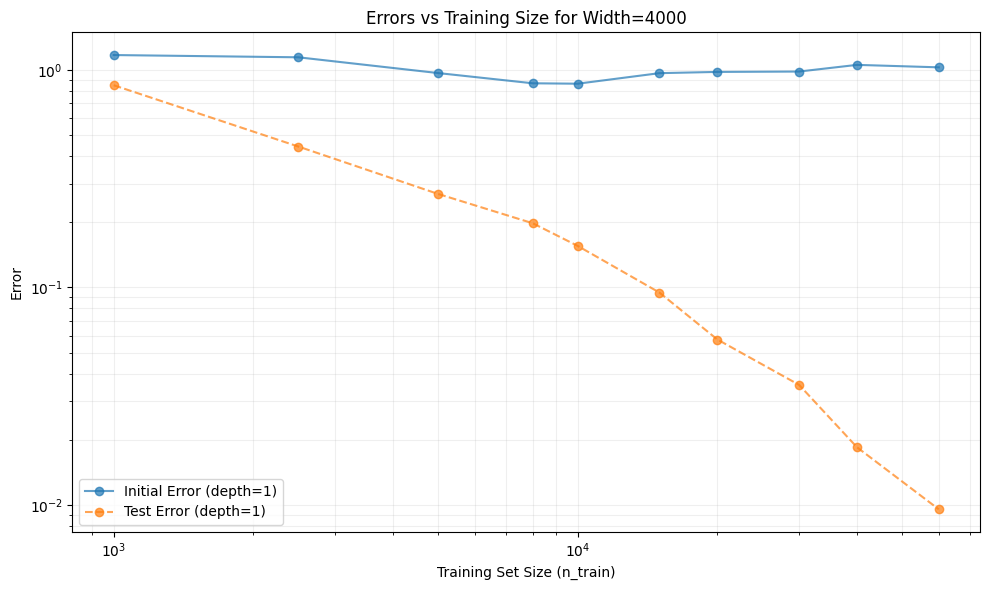


Values for width=4000:

Depth=1:
n_train | initial_error | test_error
---------------------------------------------
   1000 | 1.168408 | 0.848958
   2500 | 1.140873 | 0.443776
   5000 | 0.965740 | 0.268840
   8000 | 0.866599 | 0.197134
  10000 | 0.862810 | 0.155101
  15000 | 0.964617 | 0.094696
  20000 | 0.977442 | 0.057620
  30000 | 0.981258 | 0.035653
  40000 | 1.053075 | 0.018416
  60000 | 1.025868 | 0.009562


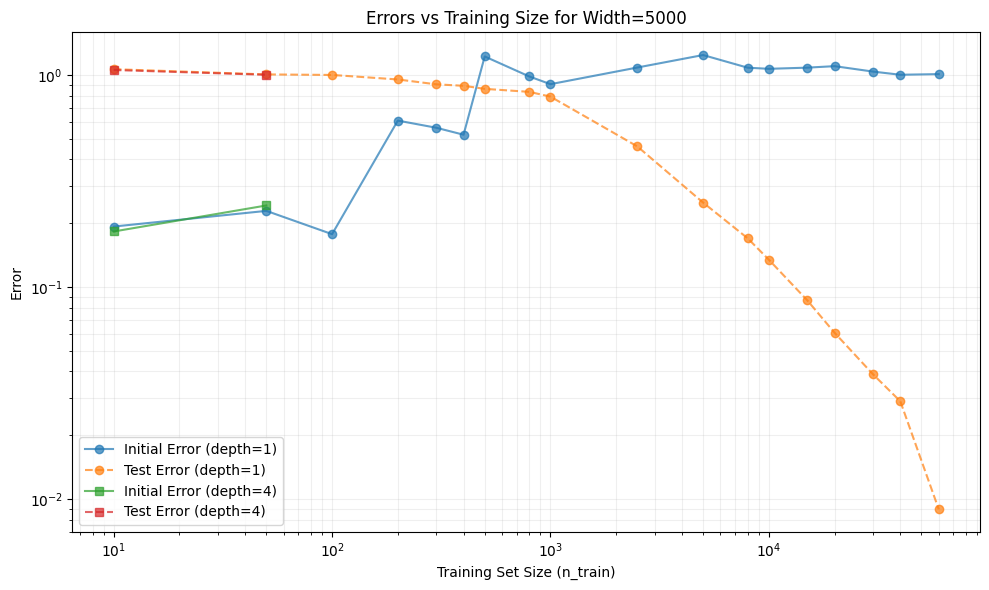


Values for width=5000:

Depth=1:
n_train | initial_error | test_error
---------------------------------------------
     10 | 0.192999 | 1.066415
     50 | 0.228814 | 1.007305
    100 | 0.177669 | 1.001744
    200 | 0.610041 | 0.953703
    300 | 0.564469 | 0.904667
    400 | 0.523275 | 0.890406
    500 | 1.224362 | 0.861212
    800 | 0.985234 | 0.833563
   1000 | 0.906151 | 0.791511
   2500 | 1.085926 | 0.460794
   5000 | 1.243397 | 0.250418
   8000 | 1.083825 | 0.169918
  10000 | 1.070598 | 0.134642
  15000 | 1.084332 | 0.086601
  20000 | 1.102018 | 0.060890
  30000 | 1.038871 | 0.038771
  40000 | 1.003732 | 0.028932
  60000 | 1.010692 | 0.008950

Depth=4:
n_train | initial_error | test_error
---------------------------------------------
     10 | 0.182915 | 1.056832
     50 | 0.242624 | 1.003473


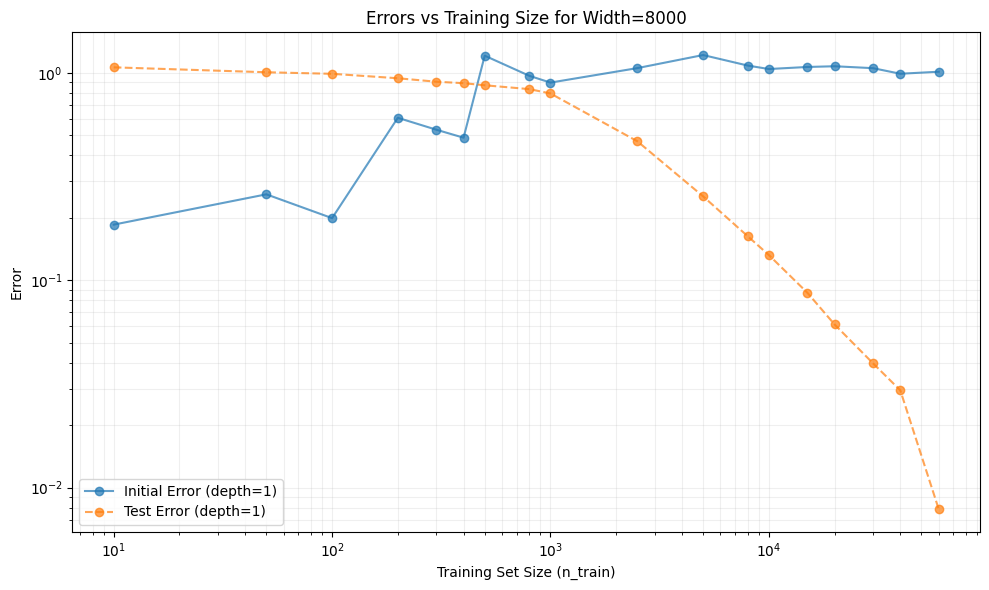


Values for width=8000:

Depth=1:
n_train | initial_error | test_error
---------------------------------------------
     10 | 0.185338 | 1.062598
     50 | 0.259446 | 1.006096
    100 | 0.199169 | 0.988857
    200 | 0.606765 | 0.941224
    300 | 0.531715 | 0.905776
    400 | 0.486438 | 0.891213
    500 | 1.209302 | 0.870700
    800 | 0.967212 | 0.834358
   1000 | 0.896874 | 0.795087
   2500 | 1.053473 | 0.467577
   5000 | 1.217867 | 0.253722
   8000 | 1.083887 | 0.163025
  10000 | 1.042749 | 0.132281
  15000 | 1.066812 | 0.087098
  20000 | 1.075437 | 0.061204
  30000 | 1.052747 | 0.039751
  40000 | 0.989428 | 0.029453
  60000 | 1.011959 | 0.007863


In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# Load all results from directory
results_dir = "/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_NN_1612_standard"
result_files = glob.glob(os.path.join(results_dir, "*rank*.json"))

# Combine results from all files
all_results = []
for file in result_files:
    try:
        with open(file, 'r') as f:
            results = json.load(f)
            if isinstance(results, list):
                all_results.extend(results)
            else:
                all_results.append(results)
    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"Loaded {len(all_results)} total results from {len(result_files)} files")

# Get unique widths and sort them
widths = sorted(list(set(r['hidden_size'] for r in all_results)))
print("\nAvailable widths:", widths)

# Create a plot for each width
for width in widths:
    # Filter results for this width (all depths)
    width_results = [r for r in all_results if r['hidden_size'] == width]
    
    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Get unique depths for this width
    depths = sorted(list(set(r['depth'] for r in width_results)))
    
    # Different marker for each depth
    markers = ['o', 's', '^']  # circle, square, triangle
    
    for i, depth in enumerate(depths):
        # Filter for this depth
        depth_results = [r for r in width_results if r['depth'] == depth]
        depth_results.sort(key=lambda x: x['n_train'])
        
        n_trains = [r['n_train'] for r in depth_results]
        test_errors = [r['test_error'] for r in depth_results]
        initial_errors = [r['initial_train_error'] for r in depth_results]
        
        # Plot both initial and test errors
        plt.loglog(n_trains, initial_errors, markers[i] + '-', 
                  label=f'Initial Error (depth={depth})', alpha=0.7)
        plt.loglog(n_trains, test_errors, markers[i] + '--',
                  label=f'Test Error (depth={depth})', alpha=0.7)
    
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Training Set Size (n_train)')
    plt.ylabel('Error')
    plt.title(f'Errors vs Training Size for Width={width}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print values for verification
    print(f"\nValues for width={width}:")
    for depth in depths:
        depth_results = [r for r in width_results if r['depth'] == depth]
        depth_results.sort(key=lambda x: x['n_train'])
        print(f"\nDepth={depth}:")
        print("n_train | initial_error | test_error")
        print("-" * 45)
        for r in depth_results:
            print(f"{r['n_train']:7d} | {r['initial_train_error']:.6f} | {r['test_error']:.6f}")

Processing n_train = 10
Processing n_train = 50
Processing n_train = 100
Processing n_train = 200
Processing n_train = 500
Processing n_train = 1000
Processing n_train = 2000
Processing n_train = 5000
Processing n_train = 10000
Processing n_train = 60000

Statistics:

n_train = 10
Mean: 1.878545
Std:  0.373902
Min:  1.229742
Max:  2.669024

n_train = 50
Mean: 1.725035
Std:  0.451142
Min:  1.287997
Max:  3.516601

n_train = 100
Mean: 1.886808
Std:  0.408706
Min:  1.384822
Max:  3.128454

n_train = 200
Mean: 1.754587
Std:  0.361187
Min:  1.347778
Max:  2.859619

n_train = 500
Mean: 1.848457
Std:  0.360808
Min:  1.231905
Max:  2.960130

n_train = 1000
Mean: 1.867944
Std:  0.388926
Min:  1.462332
Max:  3.025720

n_train = 2000
Mean: 1.944445
Std:  0.536446
Min:  1.342251
Max:  3.284103

n_train = 5000
Mean: 1.858774
Std:  0.621432
Min:  1.351946
Max:  4.731806

n_train = 10000
Mean: 1.734969
Std:  0.319849
Min:  1.335292
Max:  2.597842

n_train = 60000
Mean: 1.761778
Std:  0.338237
Min:  1

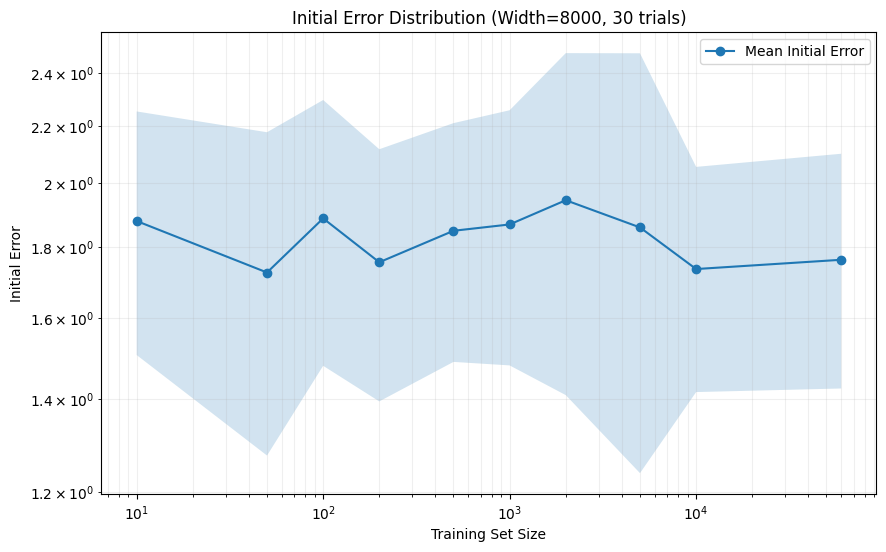

In [6]:
# Imports
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from typing import List, Tuple

# Function to generate polynomial data (simplified version)
def generate_latent_poly_data(n_samples, ambient_dim=20, latent_dim=3, degree=5, noise_std=0.0, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
        
    # Generate random orthogonal matrix for latent directions
    U, _ = np.linalg.qr(np.random.randn(ambient_dim, latent_dim))
    
    # Generate input data from N(0, Id)
    X = np.random.randn(n_samples, ambient_dim)
    
    # Project onto latent space
    X_latent = X @ U
    
    # Generate polynomial terms (simplifying to just squared terms for this test)
    y = np.zeros(n_samples)
    for i in range(latent_dim):
        y += X_latent[:, i]**2
    
    return X, y

# Neural Network class (simplified version)
class DeepNN(nn.Module):
    def __init__(self, d: int, hidden_size: int):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(d, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )
        
        # Special initialization as in original code
        gain = nn.init.calculate_gain('relu')
        std = gain / np.sqrt(d)
        nn.init.normal_(self.network[0].weight, mean=0.0, std=std)
        nn.init.zeros_(self.network[0].bias)
        nn.init.normal_(self.network[2].weight, std=0.01)
        nn.init.zeros_(self.network[2].bias)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x).reshape(-1, 1)

# Test function
def check_initial_error(n_trials=10):
    # Fixed parameters
    ambient_dim = 20
    hidden_size = 8000
    n_train_sizes = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000,60000]
    
    # Store results
    results = {n: [] for n in n_train_sizes}
    
    # Generate fixed test data
    X_test, y_test = generate_latent_poly_data(n_samples=1000, random_state=42)
    y_test_mean = np.mean(y_test)
    y_test_std = np.std(y_test)
    y_test_normalized = (y_test - y_test_mean) / y_test_std
    
    # Convert test data to torch
    X_test = torch.FloatTensor(X_test)
    y_test = torch.FloatTensor(y_test_normalized).reshape(-1, 1)
    
    # For each training size
    for n_train in n_train_sizes:
        print(f"Processing n_train = {n_train}")
        
        # Generate training data
        X_train, y_train = generate_latent_poly_data(n_samples=n_train, random_state=42)
        y_train_normalized = (y_train - y_test_mean) / y_test_std  # Use same normalization as test
        
        # Convert to torch
        X_train = torch.FloatTensor(X_train)
        y_train = torch.FloatTensor(y_train_normalized).reshape(-1, 1)
        
        # Multiple trials with different initializations
        for _ in range(n_trials):
            model = DeepNN(ambient_dim, hidden_size)
            criterion = nn.MSELoss()
            
            # Get initial error
            with torch.no_grad():
                test_pred = model(X_test)
                error = criterion(test_pred, y_test).item()
                results[n_train].append(error)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    n_trains = sorted(results.keys())
    
    # Plot mean and std
    means = [np.mean(results[n]) for n in n_trains]
    stds = [np.std(results[n]) for n in n_trains]
    
    plt.loglog(n_trains, means, 'o-', label='Mean Initial Error')
    plt.fill_between(n_trains, 
                    [m - s for m, s in zip(means, stds)],
                    [m + s for m, s in zip(means, stds)],
                    alpha=0.2)
    
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Training Set Size')
    plt.ylabel('Initial Error')
    plt.title(f'Initial Error Distribution (Width={hidden_size}, {n_trials} trials)')
    plt.legend()
    
    # Print statistics
    print("\nStatistics:")
    for n in n_trains:
        print(f"\nn_train = {n}")
        print(f"Mean: {np.mean(results[n]):.6f}")
        print(f"Std:  {np.std(results[n]):.6f}")
        print(f"Min:  {np.min(results[n]):.6f}")
        print(f"Max:  {np.max(results[n]):.6f}")
    
    return results

# Run the test
results = check_initial_error(n_trials=30)
plt.show()

In [9]:
from itertools import product
import numpy as np
import torch
import torch.nn as nn

def generate_polynomials(r, d):
    """
    Generate all multi-indices where sum(alpha) <= d
    r: number of variables
    d: maximum degree
    """
    indices = [alpha for alpha in product(range(d + 1), repeat=r) if sum(alpha) <= d]
    return indices

class DeepNN(nn.Module):
    def __init__(self, d: int, hidden_size: int, depth: int, mode: str = 'standard'):
        super().__init__()
        torch.set_default_dtype(torch.float32)
        
        self.mode = mode
        self.depth = depth
        self.hidden_size = hidden_size
        self.input_dim = d
        
        layers = []
        prev_dim = d
        
        for layer_idx in range(depth):
            linear = nn.Linear(prev_dim, hidden_size)
            
            if mode == 'standard':
                nn.init.xavier_uniform_(linear.weight)
                nn.init.zeros_(linear.bias)
            
            layers.extend([
                linear,
                nn.ReLU()
            ])
            prev_dim = hidden_size
        
        # Final layer
        final_layer = nn.Linear(prev_dim, 1)
        if mode == 'standard':
            nn.init.xavier_uniform_(final_layer.weight)
        nn.init.zeros_(final_layer.bias)
        layers.append(final_layer)
        
        self.network = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x).reshape(-1, 1)

def check_data_normalization():
    # Parameters from your code
    ambient_dim = 20
    latent_dim = 3
    degree = 5
    noise_std = 0.0
    data_random_seed = 42
    
    # First generate X_test and y_test that will be fixed
    np.random.seed(data_random_seed)
    
    # Generate initial polynomial (same as in your code)
    U, _ = np.linalg.qr(np.random.randn(ambient_dim, latent_dim))
    X_test = np.random.randn(10000, ambient_dim)
    X_test_latent = X_test @ U
    
    # Generate polynomial terms
    terms = generate_polynomials(latent_dim, degree)
    y_test = np.zeros(10000)
    
    # Add each polynomial term with fixed coefficients
    np.random.seed(data_random_seed)  # Reset seed for consistent coefficients
    coeffs = []
    for term in terms:
        if sum(term) > 0:  # Skip constant term
            coef = np.random.randn()
            coeffs.append(coef)
            term_value = np.ones(10000)
            for dim, power in enumerate(term):
                if power > 0:
                    term_value *= X_test_latent[:, dim] ** power
            y_test += coef * term_value
    
    # Now generate different sized training sets using same polynomial
    n_train_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 60000]
    
    print("Training Set Statistics:")
    print("n_train | mean | std | min | max")
    print("-" * 50)
    
    # Generate max size training set
    X_train_full = np.random.randn(60000, ambient_dim)
    X_train_latent = X_train_full @ U
    y_train_full = np.zeros(60000)
    
    # Use same polynomial with same coefficients
    coeff_idx = 0
    for term in terms:
        if sum(term) > 0:
            term_value = np.ones(60000)
            for dim, power in enumerate(term):
                if power > 0:
                    term_value *= X_train_latent[:, dim] ** power
            y_train_full += coeffs[coeff_idx] * term_value
            coeff_idx += 1
            
    # Calculate normalization from full training set
    y_train_mean = np.mean(y_train_full)
    y_train_std = np.std(y_train_full)
    
    for n_train in n_train_sizes:
        # Sample subset
        indices = np.random.choice(60000, size=n_train, replace=False)
        y_train_subset = y_train_full[indices]
        
        # Normalize using FULL training set statistics
        y_train_norm = (y_train_subset - y_train_mean) / y_train_std
        
        print(f"{n_train:7d} | {np.mean(y_train_norm):.6f} | {np.std(y_train_norm):.6f} | "
              f"{np.min(y_train_norm):.6f} | {np.max(y_train_norm):.6f}")
    
    # Normalize test set with same statistics
    y_test_norm = (y_test - y_train_mean) / y_train_std
    print("\nTest Set Statistics:")
    print(f"Mean: {np.mean(y_test_norm):.6f}")
    print(f"Std:  {np.std(y_test_norm):.6f}")
    print(f"Min:  {np.min(y_test_norm):.6f}")
    print(f"Max:  {np.max(y_test_norm):.6f}")

    # Now check model initialization
    print("\nChecking Model Initialization:")
    device = torch.device('cpu')
    hidden_size = 8000
    torch.manual_seed(data_random_seed)  # Fix seed for model init
    model = DeepNN(ambient_dim, hidden_size, depth=1, mode='standard').to(device)
    
    # Convert test data to torch tensors
    X_test_torch = torch.FloatTensor(X_test)
    y_test_torch = torch.FloatTensor(y_test_norm).reshape(-1, 1)
    
    # Check initial error for different sized training sets
    criterion = nn.MSELoss()
    for n_train in n_train_sizes:
        indices = np.random.choice(60000, size=n_train, replace=False)
        X_train = X_train_full[indices]
        y_train = y_train_full[indices]
        
        # Normalize using full training set statistics
        y_train_norm = (y_train - y_train_mean) / y_train_std
        
        # Convert to torch
        X_train_torch = torch.FloatTensor(X_train)
        y_train_torch = torch.FloatTensor(y_train_norm).reshape(-1, 1)
        
        # Get initial error
        with torch.no_grad():
            train_pred = model(X_train_torch)
            test_pred = model(X_test_torch)
            train_error = criterion(train_pred, y_train_torch).item()
            test_error = criterion(test_pred, y_test_torch).item()
            print(f"n_train={n_train:7d} | train_error={train_error:.6f} | test_error={test_error:.6f}")

# Run the check
check_data_normalization()

Training Set Statistics:
n_train | mean | std | min | max
--------------------------------------------------
     10 | 0.422658 | 1.181544 | -0.456141 | 3.687683
     50 | 0.098920 | 0.476490 | -0.920153 | 2.366148
    100 | -0.091802 | 0.929546 | -6.437659 | 2.947987
    500 | 0.023481 | 0.665555 | -4.893551 | 9.059984
   1000 | -0.030883 | 0.756665 | -9.370779 | 7.270097
   5000 | 0.027503 | 1.081682 | -15.407269 | 30.538114
  10000 | 0.006455 | 0.979915 | -15.670750 | 24.547961
  60000 | -0.000000 | 1.000000 | -33.339081 | 35.415967

Test Set Statistics:
Mean: 0.000431
Std:  0.977357
Min:  -19.351228
Max:  20.325864

Checking Model Initialization:
n_train=     10 | train_error=1.634405 | test_error=0.976521
n_train=     50 | train_error=0.989947 | test_error=0.976521
n_train=    100 | train_error=0.466721 | test_error=0.976521
n_train=    500 | train_error=0.813514 | test_error=0.976521
n_train=   1000 | train_error=0.647986 | test_error=0.976521
n_train=   5000 | train_error=0.8968

Processing n_train = 10
Processing n_train = 100
Processing n_train = 1000
Processing n_train = 10000
Processing n_train = 60000


/tmp/ipykernel_728146/2666659665.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=n_train_sizes)
/tmp/ipykernel_728146/2666659665.py:129: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=n_train_sizes)


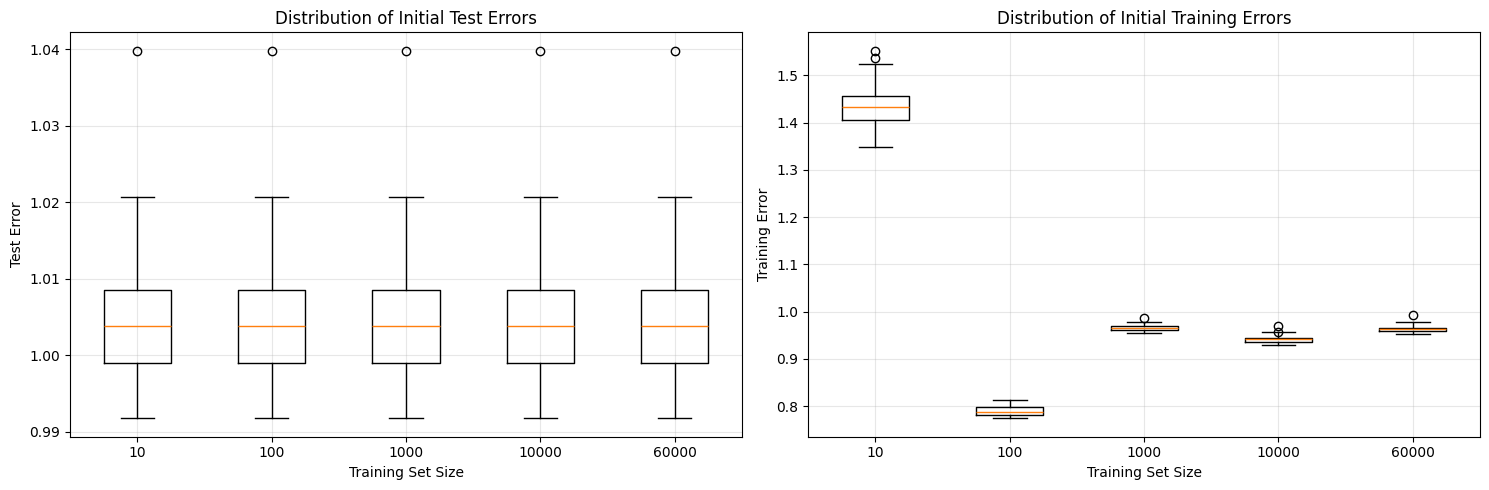


Test Error Statistics:
n_train | mean ± std | min | max
--------------------------------------------------
     10 | 1.005 ± 0.008 | 0.992 | 1.040
    100 | 1.005 ± 0.008 | 0.992 | 1.040
   1000 | 1.005 ± 0.008 | 0.992 | 1.040
  10000 | 1.005 ± 0.008 | 0.992 | 1.040
  60000 | 1.005 ± 0.008 | 0.992 | 1.040

Train Error Statistics:
n_train | mean ± std | min | max
--------------------------------------------------
     10 | 1.435 ± 0.044 | 1.348 | 1.552
    100 | 0.790 ± 0.010 | 0.774 | 0.812
   1000 | 0.966 ± 0.007 | 0.954 | 0.986
  10000 | 0.942 ± 0.007 | 0.930 | 0.970
  60000 | 0.963 ± 0.007 | 0.953 | 0.992


In [11]:
import numpy as np
import torch
import torch.nn as nn
from itertools import product
import matplotlib.pyplot as plt

def generate_polynomials(r, d):
    indices = [alpha for alpha in product(range(d + 1), repeat=r) if sum(alpha) <= d]
    return indices

class DeepNN(nn.Module):
    def __init__(self, d: int, hidden_size: int, depth: int, mode: str = 'standard'):
        super().__init__()
        torch.set_default_dtype(torch.float32)
        
        self.mode = mode
        self.depth = depth
        self.hidden_size = hidden_size
        self.input_dim = d
        
        layers = []
        prev_dim = d
        
        for layer_idx in range(depth):
            linear = nn.Linear(prev_dim, hidden_size)
            nn.init.xavier_uniform_(linear.weight)
            nn.init.zeros_(linear.bias)
            
            layers.extend([
                linear,
                nn.ReLU()
            ])
            prev_dim = hidden_size
        
        # Final layer
        final_layer = nn.Linear(prev_dim, 1)
        nn.init.xavier_uniform_(final_layer.weight)
        nn.init.zeros_(final_layer.bias)
        layers.append(final_layer)
        
        self.network = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x).reshape(-1, 1)

# Test initialization variance
def test_initialization_variance(n_trials=50):
    # Fixed parameters
    ambient_dim = 20
    hidden_size = 8000
    depth = 1
    n_train_sizes = [10, 100, 1000, 10000,60000]
    device = torch.device('cpu')
    
    # Generate fixed data using your functions
    np.random.seed(42)
    U, _ = np.linalg.qr(np.random.randn(ambient_dim, 3))
    X_test = np.random.randn(10000, ambient_dim)
    X_test_latent = X_test @ U
    
    # Simple polynomial for test
    y_test = np.sum(X_test_latent ** 2, axis=1)
    
    # Normalize test data
    y_test_mean = np.mean(y_test)
    y_test_std = np.std(y_test)
    y_test_normalized = (y_test - y_test_mean) / y_test_std
    
    # Convert test data to torch
    X_test = torch.FloatTensor(X_test).to(device)
    y_test = torch.FloatTensor(y_test_normalized).reshape(-1, 1).to(device)
    
    # Store results for each n_train size
    results = {n: [] for n in n_train_sizes}
    
    criterion = nn.MSELoss()
    
    # For each training size
    for n_train in n_train_sizes:
        print(f"Processing n_train = {n_train}")
        
        # Generate fixed training data
        X_train = np.random.randn(n_train, ambient_dim)
        X_train_latent = X_train @ U
        y_train = np.sum(X_train_latent ** 2, axis=1)
        y_train_normalized = (y_train - y_test_mean) / y_test_std
        
        # Convert to torch
        X_train = torch.FloatTensor(X_train).to(device)
        y_train = torch.FloatTensor(y_train_normalized).reshape(-1, 1).to(device)
        
        # Try multiple initializations
        for i in range(n_trials):
            torch.manual_seed(i)  # Different seed each time
            model = DeepNN(ambient_dim, hidden_size, depth).to(device)
            
            # Get initial errors
            with torch.no_grad():
                test_pred = model(X_test)
                train_pred = model(X_train)
                test_error = criterion(test_pred, y_test).item()
                train_error = criterion(train_pred, y_train).item()
                results[n_train].append({
                    'test_error': test_error,
                    'train_error': train_error
                })
    
    # Plot results
    plt.figure(figsize=(15, 5))
    
    # Test errors
    plt.subplot(1, 2, 1)
    box_data = [
        [r['test_error'] for r in results[n]] 
        for n in n_train_sizes
    ]
    plt.boxplot(box_data, labels=n_train_sizes)
    plt.title('Distribution of Initial Test Errors')
    plt.xlabel('Training Set Size')
    plt.ylabel('Test Error')
    plt.grid(True, alpha=0.3)
    
    # Training errors
    plt.subplot(1, 2, 2)
    box_data = [
        [r['train_error'] for r in results[n]] 
        for n in n_train_sizes
    ]
    plt.boxplot(box_data, labels=n_train_sizes)
    plt.title('Distribution of Initial Training Errors')
    plt.xlabel('Training Set Size')
    plt.ylabel('Training Error')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\nTest Error Statistics:")
    print("n_train | mean ± std | min | max")
    print("-" * 50)
    for n in n_train_sizes:
        test_errors = [r['test_error'] for r in results[n]]
        print(f"{n:7d} | {np.mean(test_errors):.3f} ± {np.std(test_errors):.3f} | "
              f"{np.min(test_errors):.3f} | {np.max(test_errors):.3f}")
    
    print("\nTrain Error Statistics:")
    print("n_train | mean ± std | min | max")
    print("-" * 50)
    for n in n_train_sizes:
        train_errors = [r['train_error'] for r in results[n]]
        print(f"{n:7d} | {np.mean(train_errors):.3f} ± {np.std(train_errors):.3f} | "
              f"{np.min(train_errors):.3f} | {np.max(train_errors):.3f}")

test_initialization_variance()

In [1]:
import numpy as np
import torch
import torch.nn as nn
from itertools import product

def generate_polynomials(r, d):
    """
    Generate all multi-indices where sum(alpha) <= d
    """
    indices = [alpha for alpha in product(range(d + 1), repeat=r) if sum(alpha) <= d]
    return indices

def generate_latent_poly_data(n_samples, ambient_dim, latent_dim, degree, noise_std=0.0, random_state=None):
    """
    Generate synthetic data without normalization
    """
    if random_state is not None:
        np.random.seed(random_state)
        
    U, _ = np.linalg.qr(np.random.randn(ambient_dim, latent_dim))
    X = np.random.randn(n_samples, ambient_dim)
    X_latent = X @ U
    
    terms = generate_polynomials(latent_dim, degree)
    y = np.zeros(n_samples)
    
    coeff_vec = []
    for term in terms:
        if sum(term) > 0:  # Skip constant term
            coef = np.random.randn()
            coeff_vec.append(coef)
            term_value = np.ones(n_samples)
            for dim, power in enumerate(term):
                if power > 0:
                    term_value *= X_latent[:, dim] ** power
            y += coef * term_value
    
    return X, y, U, coeff_vec

def generate_fixed_test_data(ambient_dim, latent_dim, degree, n_test=10000, noise_std=0.0, U=None, coeff_vec=None, random_state=None):
    """
    Generate test set using same U matrix and coefficients
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    X_test = np.random.randn(n_test, ambient_dim)
    X_test_latent = X_test @ U
    y_test = np.zeros(n_test)
    
    terms = generate_polynomials(latent_dim, degree)
    coeff_idx = 0
    for term in terms:
        if sum(term) > 0:  # Skip constant term
            term_value = np.ones(n_test)
            for dim, power in enumerate(term):
                if power > 0:
                    term_value *= X_test_latent[:, dim] ** power
            y_test += coeff_vec[coeff_idx] * term_value
            coeff_idx += 1
    
    return X_test, y_test

class DeepNN(nn.Module):
    def __init__(self, d: int, hidden_size: int, depth: int):
        super().__init__()
        torch.set_default_dtype(torch.float32)
        
        layers = []
        prev_dim = d
        
        for _ in range(depth):
            linear = nn.Linear(prev_dim, hidden_size)
            nn.init.xavier_uniform_(linear.weight)
            nn.init.zeros_(linear.bias)
            layers.extend([linear, nn.ReLU()])
            prev_dim = hidden_size
        
        final_layer = nn.Linear(prev_dim, 1)
        nn.init.xavier_uniform_(final_layer.weight)
        nn.init.zeros_(final_layer.bias)
        layers.append(final_layer)
        
        self.network = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x).reshape(-1, 1)

def check_initialization():
    # Parameters
    ambient_dim = 20
    latent_dim = 3
    degree = 5
    data_random_seed = 42
    max_train_size = 60000
    device = torch.device('cpu')
    
    # Generate full dataset
    print("Generating data...")
    X_train_full, y_train_full, U, coeff_vec = generate_latent_poly_data(
        n_samples=max_train_size,
        ambient_dim=ambient_dim,
        latent_dim=latent_dim,
        degree=degree,
        noise_std=0.0,
        random_state=data_random_seed
    )
    
    # Generate fixed test set
    X_test_fixed, y_test_fixed = generate_fixed_test_data(
        ambient_dim=ambient_dim,
        latent_dim=latent_dim,
        degree=degree,
        n_test=10000,
        noise_std=0.0,
        U=U,
        coeff_vec=coeff_vec,
        random_state=data_random_seed
    )
    
    # Calculate normalization from full training set
    y_train_mean = np.mean(y_train_full)
    y_train_std = np.std(y_train_full)
    
    # Normalize datasets
    y_train_full_normalized = (y_train_full - y_train_mean) / y_train_std
    y_test_fixed_normalized = (y_test_fixed - y_train_mean) / y_train_std
    
    print("\nInitial data check:")
    print(f"y_train_full mean: {np.mean(y_train_full_normalized):.6f}")
    print(f"y_train_full std: {np.std(y_train_full_normalized):.6f}")
    print(f"y_test_fixed mean: {np.mean(y_test_fixed_normalized):.6f}")
    print(f"y_test_fixed std: {np.std(y_test_fixed_normalized):.6f}")
    
    # Convert test data to torch once
    X_test = torch.FloatTensor(X_test_fixed).to(device)
    y_test = torch.FloatTensor(y_test_fixed_normalized).reshape(-1, 1).to(device)
    
    # Test different training sizes
    n_train_sizes = [10, 100, 1000, 10000, 60000]
    criterion = nn.MSELoss()
    
    for n_train in n_train_sizes:
        print(f"\nChecking n_train={n_train}:")
        
        # Sample training data
        indices = np.random.choice(max_train_size, size=n_train, replace=False)
        X_train = X_train_full[indices]
        y_train = y_train_full_normalized[indices]
        
        print(f"Sampled y_train mean: {np.mean(y_train):.6f}")
        print(f"Sampled y_train std: {np.std(y_train):.6f}")
        
        # Convert to torch
        X_train = torch.FloatTensor(X_train).to(device)
        y_train = torch.FloatTensor(y_train).reshape(-1, 1).to(device)
        
        # Try 5 different initializations
        for seed in range(5):
            torch.manual_seed(seed)
            model = DeepNN(ambient_dim, hidden_size=8000, depth=1).to(device)
            
            with torch.no_grad():
                train_pred = model(X_train)
                test_pred = model(X_test)
                
                train_error = criterion(train_pred, y_train).item()
                test_error = criterion(test_pred, y_test).item()
                
                print(f"Seed {seed}:")
                print(f"  Initial train error: {train_error:.6f}")
                print(f"  Initial test error: {test_error:.6f}")
                print(f"  Predictions mean: {torch.mean(test_pred):.6f}")
                print(f"  Predictions std: {torch.std(test_pred):.6f}")

if __name__ == "__main__":
    check_initialization()

Generating data...

Initial data check:
y_train_full mean: -0.000000
y_train_full std: 1.000000
y_test_fixed mean: -0.000661
y_test_fixed std: 1.029928

Checking n_train=10:
Sampled y_train mean: -0.045115
Sampled y_train std: 0.663807
Seed 0:
  Initial train error: 0.454571
  Initial test error: 1.079309
  Predictions mean: 0.045018
  Predictions std: 0.055818
Seed 1:
  Initial train error: 0.516019
  Initial test error: 1.062514
  Predictions mean: 0.045125
  Predictions std: 0.058282
Seed 2:
  Initial train error: 0.405877
  Initial test error: 1.050841
  Predictions mean: 0.025878
  Predictions std: 0.060589
Seed 3:
  Initial train error: 0.462657
  Initial test error: 1.056928
  Predictions mean: 0.044236
  Predictions std: 0.051660
Seed 4:
  Initial train error: 0.473056
  Initial test error: 1.052260
  Predictions mean: 0.014646
  Predictions std: 0.051098

Checking n_train=100:
Sampled y_train mean: -0.014672
Sampled y_train std: 0.816993
Seed 0:
  Initial train error: 0.678104

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_all_comparisons(nn_results_dir: str, 
                        ntk_results_path: str, 
                        width_plot_name: str, 
                        training_plot_name: str,
                        threshold_plot_name: str,
                        output_dir: str,
                        performance_threshold: float = 80.0):
    """
    Create and save three analyses of NN vs NTK performance:
    1. Test error vs width
    2. Test error vs training size (with threshold crossing markers)
    3. Training size at threshold crossing vs hidden width
    
    Args:
        nn_results_dir (str): Directory containing NN result JSON files
        ntk_results_path (str): Path to the NTK results JSON file
        width_plot_name (str): Filename for the width analysis plot
        training_plot_name (str): Filename for the training size analysis plot
        threshold_plot_name (str): Filename for the threshold crossing analysis plot
        output_dir (str): Directory where plots should be saved
        performance_threshold (float): Percentage threshold for NN outperformance of NTK
    """
    # Convert paths to Path objects and create output directory
    nn_dir = Path(nn_results_dir)
    ntk_path = Path(ntk_results_path)
    out_dir = Path(output_dir)
    out_dir.mkdir(parents=True, exist_ok=True)
    
    # Load results
    # def load_nn_results(result_files):
    #     combined_results = []
    #     for file_path in result_files:
    #         with open(file_path) as f:
    #             results = json.load(f)
    #             if isinstance(results, list):
    #                 combined_results.extend(results)
    #             else:
    #                 combined_results.append(results)
    #     return combined_results
    
    def load_nn_results(result_files):
        combined_results = []
        empty_files = []
        
        for file_path in result_files:
            try:
                with open(file_path) as f:
                    content = f.read().strip()
                    if not content:
                        empty_files.append(file_path)
                        continue
                        
                    results = json.loads(content)
                    if isinstance(results, list):
                        combined_results.extend(results)
                    else:
                        combined_results.append(results)
                        
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
                continue
        
        if empty_files:
            print("\nThe following files were empty:")
            for f in empty_files:
                print(f"  - {f}")
                
        print(f"\nTotal results loaded: {len(combined_results)}")
        return combined_results
        

    def load_ntk_results(ntk_path):
        with open(ntk_path) as f:
            return json.load(f)
    
    nn_files = list(nn_dir.glob("results*.json"))
    if not nn_files:
        raise ValueError(f"No result files found in {nn_results_dir}")
    
    try:
        nn_results = load_nn_results(nn_files)
        ntk_results = load_ntk_results(ntk_path)
        print(f"Loaded {len(nn_results)} NN results and {len(ntk_results)} NTK results")
    except Exception as e:
        raise RuntimeError(f"Error loading results: {str(e)}")

    # Extract common parameters
    depths = sorted(set(r['depth'] for r in nn_results))
    learning_rates = sorted(set(r['learning_rate'] for r in nn_results if 'learning_rate' in r))
    if not learning_rates:
        learning_rates = sorted(set(r['lr'] for r in nn_results if 'lr' in r))
    hidden_sizes = sorted(set(r['hidden_size'] for r in nn_results))
    train_sizes = sorted(set(r['n_train'] for r in nn_results))

    # Create width analysis plot
    def create_width_plot():
        n_train_sizes = len(train_sizes)
        nn_colors = plt.cm.viridis(np.linspace(0, 1, n_train_sizes))
        ntk_colors = plt.cm.Greys(np.linspace(0.3, 0.7, n_train_sizes))
        
        subplot_size = 6
        fig = plt.figure(figsize=(subplot_size * len(learning_rates), subplot_size * len(depths)))
        plt.subplots_adjust(hspace=0.4, wspace=0.3)
        
        fig.suptitle('Test Error vs Width\nfor different depths and learning rates', 
                     fontsize=20, y=1.02)
        
        for i, depth in enumerate(depths):
            for j, lr in enumerate(learning_rates):
                ax = plt.subplot(len(depths), len(learning_rates), i*len(learning_rates) + j + 1)
                ax.set_aspect('auto')
                
                # Plot NTK results
                for idx, n_train in enumerate(train_sizes):
                    ntk_widths = []
                    ntk_errors = []
                    for r in ntk_results:
                        if (r['depth'] == depth and 
                            r['n_train'] == n_train and 
                            r['training_mode'] == 'ntk' and
                            r['status'] == 'success'):
                            ntk_widths.append(r['hidden_size'])
                            ntk_errors.append(r['test_error'])
                    
                    if ntk_widths:
                        ntk_points = sorted(zip(ntk_widths, ntk_errors))
                        ntk_widths, ntk_errors = zip(*ntk_points)
                        ax.plot(ntk_widths, ntk_errors, '--', linewidth=1.5,
                               color=ntk_colors[idx], label=f'NTK n={n_train}',
                               alpha=0.7)
                
                # Plot NN results
                for idx, n_train in enumerate(train_sizes):
                    nn_widths = []
                    nn_errors = []
                    for r in nn_results:
                        if (r['depth'] == depth and 
                            (r.get('learning_rate', r.get('lr')) == lr) and
                            r['n_train'] == n_train):
                            nn_widths.append(r['hidden_size'])
                            nn_errors.append(r['test_error'])
                    
                    if nn_widths:
                        nn_points = sorted(zip(nn_widths, nn_errors))
                        nn_widths, nn_errors = zip(*nn_points)
                        ax.plot(nn_widths, nn_errors, '-', linewidth=2.5,
                               color=nn_colors[idx], label=f'NN n={n_train}')
                
                ax.set_xscale('log')
                ax.set_yscale('log')
                
                if i == len(depths)-1:
                    ax.set_xlabel('Width', fontsize=14)
                if j == 0:
                    ax.set_ylabel('Test Error', fontsize=14)
                
                ax.text(0.05, 0.95, f'd={depth}\nlr={lr:.1e}', 
                       transform=ax.transAxes, 
                       verticalalignment='top',
                       fontsize=14,
                       bbox=dict(facecolor='white', alpha=0.8))
                
                if i == 0 and j == len(learning_rates)-1:
                    ax.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
                
                ax.grid(True, which="both", ls="-", alpha=0.2)
                ax.tick_params(axis='both', which='major', labelsize=12)
        
        plt.tight_layout()
        return fig

    # Create training size analysis plot
    def create_training_plot():
        n_sizes = len(hidden_sizes)
        blues = plt.cm.Blues(np.linspace(0.4, 0.9, n_sizes))
        reds = plt.cm.Reds(np.linspace(0.4, 0.9, n_sizes))
        
        fig = plt.figure(figsize=(4*len(learning_rates), 3*len(depths)))
        fig.suptitle('Test Error vs Training Size\nfor different depths and learning rates\n' +
                    f'Orange crosses: First point where NN error ≤ {100-performance_threshold}% of NTK error', 
                     fontsize=16, y=1.02)
        
        for i, depth in enumerate(depths):
            for j, lr in enumerate(learning_rates):
                ax = plt.subplot(len(depths), len(learning_rates), i*len(learning_rates) + j + 1)
                
                for idx, hidden_size in enumerate(hidden_sizes):
                    # Get NTK results for this configuration
                    ntk_errors_dict = {}
                    for r in ntk_results:
                        if (r['depth'] == depth and 
                            r['hidden_size'] == hidden_size and 
                            r['training_mode'] == 'ntk' and
                            r['status'] == 'success'):
                            ntk_errors_dict[r['n_train']] = r['test_error']
                    
                    # Get and sort NN results
                    nn_data = [(r['n_train'], r['test_error']) 
                              for r in nn_results 
                              if r['depth'] == depth and 
                              r['hidden_size'] == hidden_size and 
                              (r.get('learning_rate', r.get('lr')) == lr)]
                    
                    if nn_data:
                        nn_points = sorted(nn_data)
                        nn_train_sizes, nn_errors = zip(*nn_points)
                        
                        # Plot NN line
                        ax.plot(nn_train_sizes, nn_errors, '-', linewidth=2, 
                               color=blues[idx], label=f'NN h={hidden_size}')
                        
                        # Find first point that outperforms NTK
                        threshold_point = None
                        for train_size, nn_error in nn_points:
                            ntk_error = ntk_errors_dict.get(train_size)
                            if ntk_error is not None:
                                if nn_error <= ntk_error * (100 - performance_threshold) / 100:
                                    threshold_point = (train_size, nn_error)
                                    break
                        
                        # Mark the threshold point if found
                        if threshold_point:
                            ax.plot(threshold_point[0], threshold_point[1], 'X', 
                                   color='orange', markersize=10, markeredgewidth=2)
                    
                    # Plot NTK line
                    ntk_train_sizes = sorted(ntk_errors_dict.keys())
                    if ntk_train_sizes:
                        ntk_errors = [ntk_errors_dict[size] for size in ntk_train_sizes]
                        ax.plot(ntk_train_sizes, ntk_errors, '--', linewidth=2, 
                               color=reds[idx], label=f'NTK h={hidden_size}')
                
                ax.set_xscale('log')
                ax.set_yscale('log')
                
                if i == len(depths)-1:
                    ax.set_xlabel('Training Size')
                if j == 0:
                    ax.set_ylabel('Test Error')
                
                ax.text(0.05, 0.95, f'd={depth}\nlr={lr:.1e}', 
                       transform=ax.transAxes, 
                       verticalalignment='top',
                       bbox=dict(facecolor='white', alpha=0.8))
                
                ax.legend(fontsize='small', loc='lower left')
                ax.grid(True, which="both", ls="-", alpha=0.2)
        
        plt.tight_layout()
        return fig

    # Create threshold crossing analysis plot
    def create_threshold_plot():
        fig, axes = plt.subplots(1, len(learning_rates), figsize=(6*len(learning_rates), 5))
        if len(learning_rates) == 1:
            axes = [axes]
            
        fig.suptitle(f'Training Size at First Performance Threshold Crossing\n' +
                     f'(When NN error first becomes ≤ {100-performance_threshold}% of NTK error)',
                     fontsize=16, y=1.02)
        
        # Create color map for depths
        depth_colors = plt.cm.viridis(np.linspace(0, 1, len(depths)))
        
        for j, lr in enumerate(learning_rates):
            ax = axes[j]
            
            # Plot data for each depth
            for depth_idx, depth in enumerate(depths):
                threshold_data = []  # Store (hidden_size, crossing_point) pairs
                
                for hidden_size in hidden_sizes:
                    # Get NTK results for this configuration
                    ntk_errors_dict = {}
                    for r in ntk_results:
                        if (r['depth'] == depth and 
                            r['hidden_size'] == hidden_size and 
                            r['training_mode'] == 'ntk' and
                            r['status'] == 'success'):
                            ntk_errors_dict[r['n_train']] = r['test_error']
                    
                    # Get and sort NN results by training size
                    nn_data = [(r['n_train'], r['test_error']) 
                              for r in nn_results 
                              if r['depth'] == depth and 
                              r['hidden_size'] == hidden_size and 
                              (r.get('learning_rate', r.get('lr')) == lr)]
                    
                    if nn_data:
                        nn_points = sorted(nn_data)
                        
                        # Find first threshold crossing
                        for train_size, nn_error in nn_points:
                            ntk_error = ntk_errors_dict.get(train_size)
                            if ntk_error is not None:
                                if nn_error <= ntk_error * (100 - performance_threshold) / 100:
                                    threshold_data.append((hidden_size, train_size))
                                    break
                
                if threshold_data:
                    hidden_widths, crossing_points = zip(*sorted(threshold_data))
                    ax.plot(hidden_widths, crossing_points, '-o', linewidth=2, 
                           markersize=6, color=depth_colors[depth_idx],
                           label=f'd={depth}')
            
            ax.set_xscale('log')
            #ax.set_yscale('log')
            
            ax.set_xlabel('Hidden Width')
            if j == 0:
                ax.set_ylabel('Training Size at Threshold')
            
            ax.text(0.05, 0.95, f'lr={lr:.1e}', 
                   transform=ax.transAxes, 
                   verticalalignment='top',
                   bbox=dict(facecolor='white', alpha=0.8))
            
            ax.grid(True, which="both", ls="-", alpha=0.2)
            ax.legend(title='Network Depth', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        return fig

    # Create and save all plots
    try:
        # Width analysis plot
        width_fig = create_width_plot()
        width_path = out_dir / width_plot_name
        width_fig.savefig(width_path, dpi=300, bbox_inches='tight')
        plt.close(width_fig)
        
        # Training size analysis plot
        training_fig = create_training_plot()
        training_path = out_dir / training_plot_name
        training_fig.savefig(training_path, dpi=300, bbox_inches='tight')
        plt.close(training_fig)
        
        # Threshold crossing analysis plot
        threshold_fig = create_threshold_plot()
        threshold_path = out_dir / threshold_plot_name
        threshold_fig.savefig(threshold_path, dpi=300, bbox_inches='tight')
        plt.close(threshold_fig)
        
        print(f"Successfully saved plots to:\n{width_path}\n{training_path}\n{threshold_path}")
    except Exception as e:
        raise RuntimeError(f"Error saving plots: {str(e)}")

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_all_comparisons(nn_results_dir: str, 
                        ntk_results_path: str, 
                        width_plot_name: str, 
                        training_plot_name: str,
                        threshold_plot_name: str,
                        final_error_plot_name: str,
                        output_dir: str,
                        performance_threshold: float = 80.0):
    """
    Create and save four analyses of NN vs NTK performance:
    1. Test error vs width
    2. Test error vs training size (with threshold crossing markers)
    3. Training size at threshold crossing vs hidden width
    4. Final train and test error vs width for largest training sizes
    """
    # Convert paths and create output directory
    nn_dir = Path(nn_results_dir)
    ntk_path = Path(ntk_results_path)
    out_dir = Path(output_dir)
    out_dir.mkdir(parents=True, exist_ok=True)
    
    def load_nn_results(result_files):
        combined_results = []
        empty_files = []
        
        for file_path in result_files:
            try:
                with open(file_path) as f:
                    content = f.read().strip()
                    if not content:
                        empty_files.append(file_path)
                        continue
                        
                    results = json.loads(content)
                    if isinstance(results, list):
                        combined_results.extend(results)
                    else:
                        combined_results.append(results)
                        
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
                continue
        
        if empty_files:
            print("\nThe following files were empty:")
            for f in empty_files:
                print(f"  - {f}")
                
        print(f"\nTotal results loaded: {len(combined_results)}")
        return combined_results

    def load_ntk_results(ntk_path):
        with open(ntk_path) as f:
            return json.load(f)
    
    nn_files = list(nn_dir.glob("results*.json"))
    if not nn_files:
        raise ValueError(f"No result files found in {nn_results_dir}")
    
    try:
        nn_results = load_nn_results(nn_files)
        ntk_results = load_ntk_results(ntk_path)
        print(f"Loaded {len(nn_results)} NN results and {len(ntk_results)} NTK results")
    except Exception as e:
        raise RuntimeError(f"Error loading results: {str(e)}")

    # Extract common parameters
    depths = sorted(set(r['depth'] for r in nn_results))
    learning_rates = sorted(set(r.get('learning_rate', r.get('lr')) for r in nn_results))
    hidden_sizes = sorted(set(r['hidden_size'] for r in nn_results))
    train_sizes = sorted(set(r['n_train'] for r in nn_results))

    # Get the correct error field names from first result
    sample_result = nn_results[0]
    training_error_field = next((field for field in ['training_error', 'train_error', 'final_train_error'] 
                               if field in sample_result), 'training_error')
    test_error_field = 'test_error'
    print(f"\nUsing error fields: {training_error_field}, {test_error_field}")

    def create_width_plot():
        n_train_sizes = len(train_sizes)
        nn_colors = plt.cm.viridis(np.linspace(0, 1, n_train_sizes))
        ntk_colors = plt.cm.Greys(np.linspace(0.3, 0.7, n_train_sizes))
        
        subplot_size = 6
        fig = plt.figure(figsize=(subplot_size * len(learning_rates), subplot_size * len(depths)))
        
        fig.suptitle('Test Error vs Width\nfor different depths and learning rates', 
                     fontsize=20, y=1.02)
        
        for i, depth in enumerate(depths):
            for j, lr in enumerate(learning_rates):
                ax = plt.subplot(len(depths), len(learning_rates), i*len(learning_rates) + j + 1)
                ax.set_aspect('auto')
                
                # Plot NTK results
                for idx, n_train in enumerate(train_sizes):
                    ntk_widths = []
                    ntk_errors = []
                    for r in ntk_results:
                        if (r['depth'] == depth and 
                            r['n_train'] == n_train and 
                            r['training_mode'] == 'ntk' and
                            r.get('status', 'success') == 'success'):
                            ntk_widths.append(r['hidden_size'])
                            ntk_errors.append(r[test_error_field])
                    
                    if ntk_widths:
                        ntk_points = sorted(zip(ntk_widths, ntk_errors))
                        ntk_widths, ntk_errors = zip(*ntk_points)
                        ax.plot(ntk_widths, ntk_errors, '--', linewidth=1.5,
                               color=ntk_colors[idx], label=f'NTK n={n_train}',
                               alpha=0.7)
                
                # Plot NN results
                for idx, n_train in enumerate(train_sizes):
                    nn_widths = []
                    nn_errors = []
                    for r in nn_results:
                        if (r['depth'] == depth and 
                            r.get('learning_rate', r.get('lr')) == lr and
                            r['n_train'] == n_train):
                            nn_widths.append(r['hidden_size'])
                            nn_errors.append(r[test_error_field])
                    
                    if nn_widths:
                        nn_points = sorted(zip(nn_widths, nn_errors))
                        nn_widths, nn_errors = zip(*nn_points)
                        ax.plot(nn_widths, nn_errors, '-', linewidth=2.5,
                               color=nn_colors[idx], label=f'NN n={n_train}')
                
                ax.set_xscale('log')
                ax.set_yscale('log')
                
                if i == len(depths)-1:
                    ax.set_xlabel('Width', fontsize=14)
                if j == 0:
                    ax.set_ylabel('Test Error', fontsize=14)
                
                ax.text(0.05, 0.95, f'd={depth}\nlr={lr:.1e}', 
                       transform=ax.transAxes, 
                       verticalalignment='top',
                       fontsize=14,
                       bbox=dict(facecolor='white', alpha=0.8))
                
                if i == 0 and j == len(learning_rates)-1:
                    ax.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
                
                ax.grid(True, which="both", ls="-", alpha=0.2)
                ax.tick_params(axis='both', which='major', labelsize=12)
        
        plt.subplots_adjust(hspace=0.4, wspace=0.3)
        return fig

    def create_training_plot():
        n_sizes = len(hidden_sizes)
        blues = plt.cm.Blues(np.linspace(0.4, 0.9, n_sizes))
        reds = plt.cm.Reds(np.linspace(0.4, 0.9, n_sizes))
        
        fig = plt.figure(figsize=(4*len(learning_rates), 3*len(depths)))
        fig.suptitle('Test Error vs Training Size\nfor different depths and learning rates\n' +
                    f'Orange crosses: First point where NN error ≤ {100-performance_threshold}% of NTK error', 
                     fontsize=16, y=1.02)
        
        for i, depth in enumerate(depths):
            for j, lr in enumerate(learning_rates):
                ax = plt.subplot(len(depths), len(learning_rates), i*len(learning_rates) + j + 1)
                
                for idx, hidden_size in enumerate(hidden_sizes):
                    # Get NTK results for this configuration
                    ntk_errors_dict = {}
                    for r in ntk_results:
                        if (r['depth'] == depth and 
                            r['hidden_size'] == hidden_size and 
                            r['training_mode'] == 'ntk' and
                            r.get('status', 'success') == 'success'):
                            ntk_errors_dict[r['n_train']] = r[test_error_field]
                    
                    # Get and sort NN results
                    nn_data = [(r['n_train'], r[test_error_field]) 
                              for r in nn_results 
                              if r['depth'] == depth and 
                              r['hidden_size'] == hidden_size and 
                              (r.get('learning_rate', r.get('lr')) == lr)]
                    
                    if nn_data:
                        nn_points = sorted(nn_data)
                        nn_train_sizes, nn_errors = zip(*nn_points)
                        
                        # Plot NN line
                        ax.plot(nn_train_sizes, nn_errors, '-', linewidth=2, 
                               color=blues[idx], label=f'NN h={hidden_size}')
                        
                        # Find first point that outperforms NTK
                        threshold_point = None
                        for train_size, nn_error in nn_points:
                            ntk_error = ntk_errors_dict.get(train_size)
                            if ntk_error is not None:
                                if nn_error <= ntk_error * (100 - performance_threshold) / 100:
                                    threshold_point = (train_size, nn_error)
                                    break
                        
                        # Mark the threshold point if found
                        if threshold_point:
                            ax.plot(threshold_point[0], threshold_point[1], 'X', 
                                   color='orange', markersize=10, markeredgewidth=2)
                    
                    # Plot NTK line
                    ntk_train_sizes = sorted(ntk_errors_dict.keys())
                    if ntk_train_sizes:
                        ntk_errors = [ntk_errors_dict[size] for size in ntk_train_sizes]
                        ax.plot(ntk_train_sizes, ntk_errors, '--', linewidth=2, 
                               color=reds[idx], label=f'NTK h={hidden_size}')
                
                ax.set_xscale('log')
                ax.set_yscale('log')
                
                if i == len(depths)-1:
                    ax.set_xlabel('Training Size')
                if j == 0:
                    ax.set_ylabel('Test Error')
                
                ax.text(0.05, 0.95, f'd={depth}\nlr={lr:.1e}', 
                       transform=ax.transAxes, 
                       verticalalignment='top',
                       bbox=dict(facecolor='white', alpha=0.8))
                
                ax.legend(fontsize='small', loc='lower left')
                ax.grid(True, which="both", ls="-", alpha=0.2)
        
        plt.subplots_adjust(hspace=0.4, wspace=0.3)
        return fig

    def create_threshold_plot():
        fig, axes = plt.subplots(1, len(learning_rates), figsize=(6*len(learning_rates), 5))
        if len(learning_rates) == 1:
            axes = [axes]
            
        fig.suptitle(f'Training Size at First Performance Threshold Crossing\n' +
                     f'(When NN error first becomes ≤ {100-performance_threshold}% of NTK error)',
                     fontsize=16, y=1.02)
        
        # Create color map for depths
        depth_colors = plt.cm.viridis(np.linspace(0, 1, len(depths)))
        
        for j, lr in enumerate(learning_rates):
            ax = axes[j]
            
            # Plot data for each depth
            for depth_idx, depth in enumerate(depths):
                threshold_data = []  # Store (hidden_size, crossing_point) pairs
                
                for hidden_size in hidden_sizes:
                    # Get NTK results for this configuration
                    ntk_errors_dict = {}
                    for r in ntk_results:
                        if (r['depth'] == depth and 
                            r['hidden_size'] == hidden_size and 
                            r['training_mode'] == 'ntk' and
                            r.get('status', 'success') == 'success'):
                            ntk_errors_dict[r['n_train']] = r[test_error_field]
                    
                    # Get and sort NN results by training size
                    nn_data = [(r['n_train'], r[test_error_field]) 
                              for r in nn_results 
                              if r['depth'] == depth and 
                              r['hidden_size'] == hidden_size and 
                              (r.get('learning_rate', r.get('lr')) == lr)]
                    
                    if nn_data:
                        nn_points = sorted(nn_data)
                        
                        # Find first threshold crossing
                        for train_size, nn_error in nn_points:
                            ntk_error = ntk_errors_dict.get(train_size)
                            if ntk_error is not None:
                                if nn_error <= ntk_error * (100 - performance_threshold) / 100:
                                    threshold_data.append((hidden_size, train_size))
                                    break
                
                if threshold_data:
                    hidden_widths, crossing_points = zip(*sorted(threshold_data))
                    ax.plot(hidden_widths, crossing_points, '-o', linewidth=2, 
                           markersize=6, color=depth_colors[depth_idx],
                           label=f'd={depth}')
            
            ax.set_xscale('log')
            
            ax.set_xlabel('Hidden Width')
            if j == 0:
                ax.set_ylabel('Training Size at Threshold')
            
            ax.text(0.05, 0.95, f'lr={lr:.1e}', 
                   transform=ax.transAxes, 
                   verticalalignment='top',
                   bbox=dict(facecolor='white', alpha=0.8))
            
            ax.grid(True, which="both", ls="-", alpha=0.2)
            ax.legend(title='Network Depth', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.subplots_adjust(hspace=0.4, wspace=0.3)
        return fig

    def create_final_error_plot():
        """
        Create plot comparing final train and test errors vs width for the two largest training sizes
        """
        largest_train_size = train_sizes[-1]
        second_largest_train_size = train_sizes[-2]
        
        subplot_size = 6
        fig = plt.figure(figsize=(subplot_size * len(learning_rates), subplot_size * len(depths)))
        
        fig.suptitle('Final Train and Test Error vs Width\nfor two largest training sizes', 
                     fontsize=20, y=1.02)
        
        for i, depth in enumerate(depths):
            for j, lr in enumerate(learning_rates):
                ax = plt.subplot(len(depths), len(learning_rates), i*len(learning_rates) + j + 1)
                
                # Plot for largest training size
                nn_largest = [(r['hidden_size'], r[training_error_field], r[test_error_field])
                             for r in nn_results
                             if r['depth'] == depth and
                             (r.get('learning_rate', r.get('lr')) == lr) and
                             r['n_train'] == largest_train_size]
                
                if nn_largest:
                    nn_largest.sort()  # Sort by hidden_size
                    hidden_sizes_largest, train_errors_largest, test_errors_largest = zip(*nn_largest)
                    ax.plot(hidden_sizes_largest, train_errors_largest, '-o', 
                           color='blue', label=f'Train (n={largest_train_size})')
                    ax.plot(hidden_sizes_largest, test_errors_largest, '-s',
                           color='red', label=f'Test (n={largest_train_size})')
                
                # Plot for second largest training size
                nn_second = [(r['hidden_size'], r[training_error_field], r[test_error_field])
                            for r in nn_results
                            if r['depth'] == depth and
                            (r.get('learning_rate', r.get('lr')) == lr) and
                            r['n_train'] == second_largest_train_size]
                
                if nn_second:
                    nn_second.sort()  # Sort by hidden_size
                    hidden_sizes_second, train_errors_second, test_errors_second = zip(*nn_second)
                    ax.plot(hidden_sizes_second, train_errors_second, '--o',
                           color='lightblue', label=f'Train (n={second_largest_train_size})')
                    ax.plot(hidden_sizes_second, test_errors_second, '--s',
                           color='pink', label=f'Test (n={second_largest_train_size})')
                
                ax.set_xscale('log')
                ax.set_yscale('log')
                
                if i == len(depths)-1:
                    ax.set_xlabel('Width', fontsize=14)
                if j == 0:
                    ax.set_ylabel('Error', fontsize=14)
                
                ax.text(0.05, 0.95, f'd={depth}\nlr={lr:.1e}', 
                       transform=ax.transAxes, 
                       verticalalignment='top',
                       fontsize=14,
                       bbox=dict(facecolor='white', alpha=0.8))
                
                if i == 0 and j == len(learning_rates)-1:
                    ax.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
                
                ax.grid(True, which="both", ls="-", alpha=0.2)
                ax.tick_params(axis='both', which='major', labelsize=12)
        
        plt.subplots_adjust(hspace=0.4, wspace=0.3)
        return fig

    # Create and save all plots
    try:
        # Width analysis plot
        width_fig = create_width_plot()
        width_path = out_dir / width_plot_name
        width_fig.savefig(width_path, dpi=300, bbox_inches='tight')
        plt.close(width_fig)
        
        # Training size analysis plot
        training_fig = create_training_plot()
        training_path = out_dir / training_plot_name
        training_fig.savefig(training_path, dpi=300, bbox_inches='tight')
        plt.close(training_fig)
        
        # Threshold crossing analysis plot
        threshold_fig = create_threshold_plot()
        threshold_path = out_dir / threshold_plot_name
        threshold_fig.savefig(threshold_path, dpi=300, bbox_inches='tight')
        plt.close(threshold_fig)
        
        # Final error comparison plot
        final_error_fig = create_final_error_plot()
        final_error_path = out_dir / final_error_plot_name
        final_error_fig.savefig(final_error_path, dpi=300, bbox_inches='tight')
        plt.close(final_error_fig)
        
        print(f"Successfully saved plots to:\n{width_path}\n{training_path}\n{threshold_path}\n{final_error_path}")
    except Exception as e:
        raise RuntimeError(f"Error saving plots: {str(e)}")



In [4]:
# Example usage
plot_all_comparisons(
    #nn_results_dir="/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_NN_1612_standard",
    nn_results_dir="/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_NN_2812_mup_lr0001",
    ntk_results_path="/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/kernel_final.json",
    width_plot_name="width_analysis_spectral.png",
    threshold_plot_name="threshold90.png",
    training_plot_name="training_analysis_spectral.png",
    final_error_plot_name="final_error_analysis.png",
    output_dir="/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots",
    performance_threshold=90
)


Total results loaded: 199
Loaded 199 NN results and 2484 NTK results

Using error fields: final_train_error, test_error
Successfully saved plots to:
/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots/width_analysis_spectral.png
/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots/training_analysis_spectral.png
/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots/threshold90.png
/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots/final_error_analysis.png


In [2]:
# Example usage
plot_all_comparisons(
    nn_results_dir="/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/low_dim_poly_NN_2812_mup_lr0001",
    ntk_results_path="/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/kernel_final.json",
    width_plot_name="width_analysis_spectral.png",
    threshold_plot_name="threshold90.png",
    training_plot_name="training_analysis_spectral.png",
    output_dir="/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots",
    final_error_plot_name="final_error_analysis.png",
    performance_threshold=90
)


Total results loaded: 827
Loaded 827 NN results and 2484 NTK results

Using error fields: final_train_error, test_error
Successfully saved plots to:
/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots/width_analysis_spectral.png
/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots/training_analysis_spectral.png
/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots/threshold90.png
/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/plots/final_error_analysis.png
